In [5]:
import rasterio
from rasterio.plot import show
from rasterio.merge import merge
from rasterio.plot import show
import rasterio.features
import rasterio.warp
import glob
import os
import rioxarray as xr
import pandas as pd
import geopandas as gpd
import numpy as np
from rasterio.enums import Resampling
from rasterio.crs import CRS
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.plot as ep
from shapely.geometry import mapping
import subprocess
from osgeo import gdal
import multiprocessing as mp
from typing import List, Any, Sequence, Tuple
import xarray as xarray
from numpy import savetxt
from matplotlib.colors import colorConverter
import scipy



%matplotlib inline


In [6]:
#import loss map with all year data
loss_map_path = '/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/Hansen_Loss_Maps/Reprojected/PIREDD_Plataue_Hansen_Loss_2014_reprojected.tif'
loss_map = xr.open_rasterio(loss_map_path)

In [7]:
np.unique(loss_map)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=uint8)

In [10]:
#create new array with only values from a specific year
loss_map_13_20 = np.where(loss_map > 13, loss_map,0)

In [11]:
np.unique(loss_map_13_20)

array([ 0, 14, 15, 16, 17, 18, 19, 20], dtype=uint8)

In [12]:
loss_map_13_19 = np.where(loss_map_13_19 < 20,1 ,0)

In [14]:
np.unique(loss_map_13_19)

array([0, 1])

In [15]:
loss_map_13_19[0].shape

(9229, 8441)

In [ ]:
plt.imshow(loss_map_13_19_n[0],interpolation='nearest')

In [16]:
#resample annual image
import scipy.ndimage

resampled_13_19 = scipy.ndimage.zoom(loss_map_13_19[0],0.09693, order=0)

In [17]:
resampled_13_19.shape

(895, 818)

In [18]:
np.count_nonzero(resampled_13_19 == 1)

729722

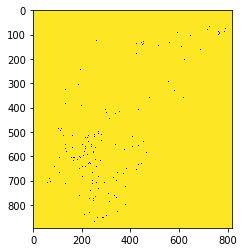

In [20]:
plt.imshow(resampled_13_19,interpolation='nearest')

In [ ]:
#save annual image
np.save('/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/Hansen_Loss_Maps/yearly_arrays/loss_map_resampled_01_13.npy',resampled_19)

## Hansen Loss Year Data

In [21]:
#import loss map with all year data
hansen_loss_year_path = '/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/loss_year/reprojected/Hansen_GFC-2020-v1.8_lossyear_00N_010E_reprojected.tif'
hansen_loss_year = xr.open_rasterio(hansen_loss_year_path)

In [22]:
#crop to study region

In [23]:
#region of interest
studyRegion = '/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/GeoJSONS/PIREDD_Plataue.geojson'
studyRegion = gpd.read_file(studyRegion)
studyRegion_crs = studyRegion.to_crs(epsg=3341)
#print(studyRegion_crs.head())
#print(studyRegion_crs.crs)

In [24]:
hansen_loss_year_crop = hansen_loss_year.rio.clip(studyRegion_crs.geometry.apply(mapping))

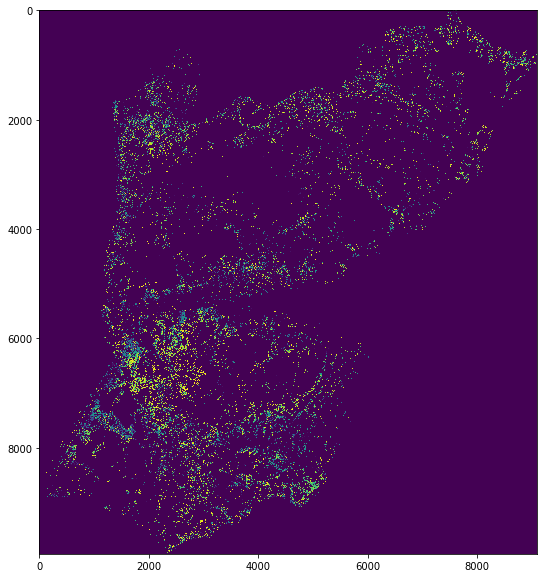

In [25]:
plt.figure(figsize = (10,10))
plt.imshow(hansen_loss_year_crop[0], interpolation='nearest' )

In [26]:
np.unique(hansen_loss_year_crop)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=uint8)

In [27]:
loss_years = np.where(hansen_loss_year_crop > 13, hansen_loss_year_crop, 0)

In [28]:
lossyears = np.where(loss_years < 20,loss_years,0 )

In [29]:
np.unique(lossyears)

array([ 0, 14, 15, 16, 17, 18, 19], dtype=uint8)

In [55]:
lossyear_2019 = np.where(lossyears == 19, 1,0)

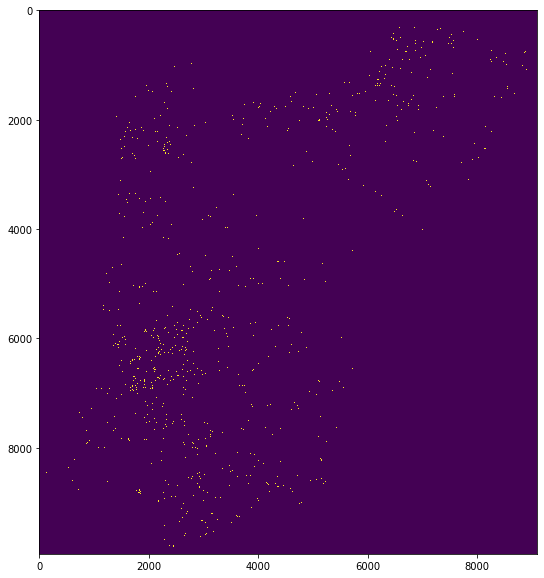

In [56]:
plt.figure(figsize = (10,10))

plt.imshow(lossyear_2019[0], interpolation='nearest')

In [57]:
lossyear_2019.shape

(1, 9936, 9100)

In [58]:
#resample annual image
import scipy.ndimage

lossyear_2019_resampled = scipy.ndimage.zoom(lossyear_2019[0],0.0900267, order=0)

In [59]:
lossyear_2019_resampled.shape

(895, 819)

In [60]:
np.save('/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/loss_year/resampled/loss_year_19.npy', lossyear_2019_resampled)